# Plotting *Your* Vowels

Welcome to this notebook! It contains some simple code for using the packages `pandas` and `matplotlib` (with some help from `seaborn`) to plot whatever vowel formants you put in your data file. For illustration, this notebook will assume you are using **data from class on 10/22 / HW6** (your cardinal vowels plus your productions of a series of English words). However, it is, we hope, relatively straight forward to adapt it to plot the formants of any other vowels you might be interested in plotting, such as the vowels of your project.

We want to extend a special **"welcome"** to those of you for whom this is your first time using a notebook or datahub or Python. We're here to help! :)

First we have to import some libraries. 
- `pandas` is a great tool for handling dataframes, the most typical way you'll see data formatted in phonetics research. 
- `seaborn` and `matplotlib` are for making plots out of data. What you'll see in this notebook is just the tip of the iceberg. There are way way way more data visualization tools included in these libraries!
- `os` just in case you want to get fancy with your file structures. Probably not but just in case.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## 1. Find and read the data

This notebook assumes that there is a file called 'formants.csv' located in the same directory as the notebook itself. You should upload one by going to your Datahub home page and using the "upload" button on the right panel, and follow the instructions. This file should be a CSV file, with three columns, and the headers "vowel", "F1", and "F2".

In [22]:
formantfile = os.path.abspath('./formants.csv')

Now that we've told the notebook where to find the data (and we have hopefully uploaded the data!), we can ask it to read it in. I always like to immediately ask it for a preview just to make sure that I've uploaded the right data.

In this case, what I'm expecting to see is a dataframe with three columns, "vowel", "F1", and "F2", with each row representing a different vowel that I've measured the formants for. Just due to how I've entered them in my CSV file, the first four are my attempts at Cardinal vowels, and their associated F1/F2, and the fifth displayed is the vowel in my production of the English word "bead".

In [2]:
formantdf = pd.read_csv(formantfile) # read this file as a dataframe
formantdf.head() # show just the first five rows of this new dataframe

,vowel,F1,F2
0,i,363.931049,3000.002731
1,a,835.000000,1491.916400
2,ɑ,819.961629,1132.451481
3,u,330.019279,874.222485
4,bead,302.583659,3044.861926


## 2. Add a category for type of vowel (Cardinal vs. word reading)

Since part of this activity is to compare your vowels while reading English words to your cardinal vowel space, we'll want to be able to separate the cardinal vowels from the other vowels when we go to plot them. One way to handle this is to define a set of text from the "vowel" column that indicate that thoes vowels are cardinal vowels. If you expanded your Cardinal vowel set, you would want to expand this as well. If you used a different method for noting your Cardinal vowels, you will also want to edit this list.

In [3]:
cardinalvowels = ['i','a','ɑ','u']

Then, we can create a new column in `formantdf` that indicates whether any given row contains a vowel that is a cardinal vowel or a vowel from a read word. I'm also going to include a separate category for the unstressed vowel \[ə\], specifically for 10/22 class.

In [23]:
formantdf['vowelcat'] = formantdf.vowel.apply(lambda x: 'cardinal' if x in cardinalvowels 
                                              else ('unstressed' if x=='ə' else 'word'))

## 3. Make a plot

We'll use a scatterplot from `seaborn` to plot the vowels. One of the nice things about using `seaborn` is being able to use additional factors (such as the "vowelcat" column we created earlier) to separate the points plotted by changing their color or size or shape. In this case, we are creating blue dots for the Cardinal vowels, orange x for the vowels from the English words, and green square for the unstressed vowel from the word "a".

You'll also notice that we used the `text` method for plots to add the text from the "vowel" columns. More typically, you might include "vowel" as a factor in the plot itself, but that would get very busy and hard to read. (See the last cell in this notebook.) In a different context (e.g. fewer vowels but multiple productions) that may be the more natural way to visualize the data.

You'll also notice that we flipped the x- and y-axes by finding the min and max values of F2 and F1 respectively, and then setting "xlim" and "ylim" to the reverse (max,min) rather than (min,max). We also added a little bit of a fudge factor to either side (of 10%) to make sure the dots were all visible.

Finally, we created a PDF version of the plot for you to do what you like with.

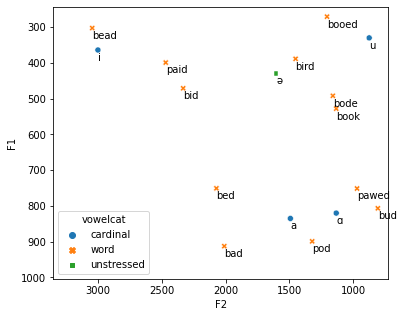

In [24]:
plt.figure(figsize=(6,5))
vplot = sns.scatterplot(x='F2', y='F1', data = formantdf, style='vowelcat', hue='vowelcat')
formantdf.apply(lambda x: vplot.text(x.F2, x.F1+30, x.vowel), axis=1)
vplot.set(xlim=(formantdf.F2.max()*1.1,formantdf.F2.min()*0.9),
          ylim=(formantdf.F1.max()*1.1,formantdf.F1.min()*0.9))
plt.savefig('vowelplot.pdf')

Here the same exact code, but with logarithmic scale on both x- and y-axes.

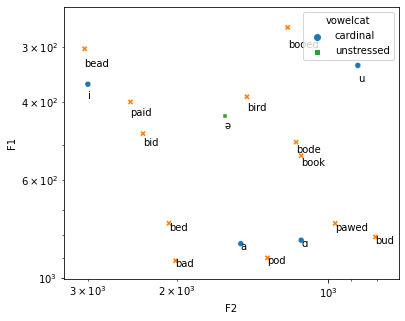

In [20]:
plt.figure(figsize=(6,5))
vplot = sns.scatterplot(x='F2', y='F1', data = formantdf, style='vowelcat', hue='vowelcat')
formantdf.apply(lambda x: vplot.text(x.F2, x.F1+30, x.vowel), axis=1)
vplot.set(xlim=(formantdf.F2.max()*1.1,formantdf.F2.min()*0.9),
          ylim=(formantdf.F1.max()*1.1,formantdf.F1.min()*0.9),
          xscale='log', yscale='log')
plt.savefig('vowelplot_log.pdf')

And here's the really busy figure where "hue" changes by vowel identity and we removed the text labels from the figure itself. (I think this is pretty hard to read!)

[(3349.3481186000004, 725.9224968), (1003.7259507, 243.69796890000003)]

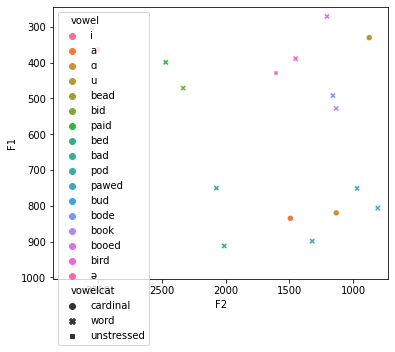

In [25]:
plt.figure(figsize=(6,5))
vplot = sns.scatterplot(x='F2', y='F1', data = formantdf, style='vowelcat', hue='vowel')
vplot.set(xlim=(formantdf.F2.max()*1.1,formantdf.F2.min()*0.9),
          ylim=(formantdf.F1.max()*1.1,formantdf.F1.min()*0.9))